In [9]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
# Define the paths to the train and test datasets
train_path = '/home/selab/darshan/git-repos/dataset/town7_dataset/train'
test_path = '/home/selab/darshan/git-repos/dataset/town7_dataset/test'

# count the number of files in the train and test datasets
train_files = os.listdir(train_path)
test_files = os.listdir(test_path)

print('Number of files in the train dataset: ', len(train_files))
print('Number of files in the test dataset: ', len(test_files))


Number of files in the train dataset:  9690
Number of files in the test dataset:  2425


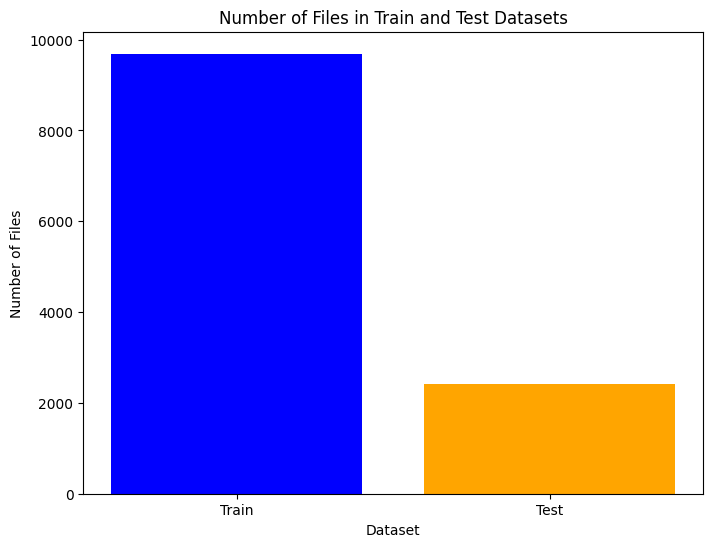

In [11]:
# Number of files in train and test datasets
num_train_files = len(train_files)
num_test_files = len(test_files)

# Plotting the data
labels = ['Train', 'Test']
values = [num_train_files, num_test_files]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Files')
plt.title('Number of Files in Train and Test Datasets')
plt.show()

label
LEFT     3327
GO       3327
RIGHT    3327
STOP     3327
Name: count, dtype: int64


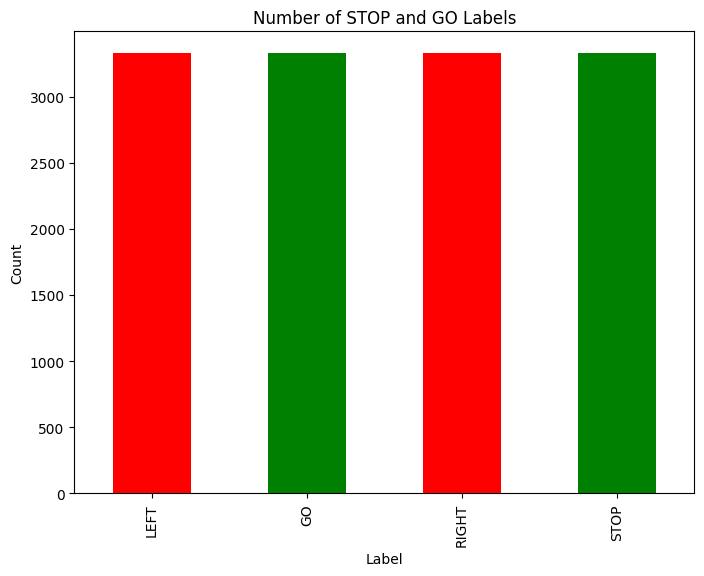

In [12]:
import pandas as pd

# Read the CSV file
csv_path = os.path.join(train_path, 'labeled_train_4_class_data_log.csv')

# Check if the file exists
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"No such file or directory: '{csv_path}'")

df = pd.read_csv(csv_path)

# Count the number of STOP and GO labels
label_counts = df['label'].value_counts()

# print number of STOP and GO labels
print(label_counts)

# Plotting the data
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of STOP and GO Labels')
plt.show()

In [13]:
def process_and_plot(data_file, output_dir):
    # Load the dataset
    df = pd.read_csv(data_file)

    # Calculate statistics for each feature
    stats = {
        'steering': df['steering'].describe(),
        'throttle': df['throttle'].describe(),
        'brake': df['brake'].describe()
    }

    # Add variance to the statistics
    def calculate_variance(series):
        return series.var()

    for feature in ['steering', 'throttle', 'brake']:
        stats[feature]['variance'] = calculate_variance(df[feature])

    #print total number of samples
    print(f"Total number of samples: {len(df)}")
    
    # Print statistics
    print(f"Statistics for dataset: {data_file}")
    for feature, stat in stats.items():
        print(f"Statistics for {feature}:")
        print(stat)
        print()

    # Create output directory for plots
    os.makedirs(output_dir, exist_ok=True)

    # Plot distributions
    for feature in ['steering', 'throttle', 'brake']:
        plt.figure(figsize=(10, 6))
        plt.hist(df[feature], bins=50, edgecolor='black', alpha=0.7)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(f"{feature} value")
        plt.ylabel("Frequency")
        plt.grid(True)
        # Save plot
        plot_path = os.path.join(output_dir, f"{feature}_distribution.png")
        plt.savefig(plot_path)
        plt.close()

    print(f"Plots saved to {output_dir}\n")

# Process train dataset
process_and_plot(
    data_file="/home/selab/darshan/git-repos/dataset/town7_dataset/train/train_data_log.csv",
    output_dir="/home/selab/darshan/git-repos/plots/dataset_images_for_4_classes/train"
)

# Process test dataset
process_and_plot(
    data_file="/home/selab/darshan/git-repos/dataset/town7_dataset/test/test_data_log.csv",
    output_dir="/home/selab/darshan/git-repos/plots/dataset_images_for_4_classes/test"
)


Total number of samples: 9687
Statistics for dataset: /home/selab/darshan/git-repos/dataset/town7_dataset/train/train_data_log.csv
Statistics for steering:
count       9687.000000
mean          -0.004192
std            0.101346
min           -0.790818
25%           -0.012980
50%            0.000000
75%            0.001198
max            0.800000
variance       0.010271
Name: steering, dtype: float64

Statistics for throttle:
count       9687.000000
mean           0.388631
std            0.393655
min            0.000000
25%            0.000000
50%            0.249863
75%            0.850000
max            0.850000
variance       0.154964
Name: throttle, dtype: float64

Statistics for brake:
count       9687.000000
mean           0.384749
std            0.468402
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max            1.000000
variance       0.219400
Name: brake, dtype: float64

Plots saved to /home/selab/darshan/git-repos/plots/datas

In [14]:
# def plot_label_distribution(file_path, output_path, dataset_name):
#     # Load the processed dataset
#     df = pd.read_csv(file_path)

#     # Calculate label distribution
#     label_counts = df['label'].value_counts()

#     # Plot pie chart
#     plt.figure(figsize=(8, 8))
#     explode = [0.1] * len(label_counts)
#     label_counts.plot.pie(autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
#     plt.title(f'Label Distribution in {dataset_name} Dataset')
#     plt.ylabel('')  # Hide the default ylabel

#     # Create output directory if it does not exist
#     os.makedirs(output_path, exist_ok=True)

#     # Save the plot
#     plot_file = os.path.join(output_path, f"{dataset_name}_label_distribution.png")
#     plt.savefig(plot_file)
#     plt.close()

#     print(f"Pie chart saved for {dataset_name} dataset at {plot_file}")

# # File paths and output directory
# train_file = "/home/selab/darshan/git-repos/plots/dataset_images_for_4_classes/train/processed_data.csv"
# test_file = "/home/selab/darshan/git-repos/plots/dataset_images_for_4_classes/test/processed_data.csv"
# output_path = "./plots/dataset_images_for_4_classes"

# # Plot for train dataset
# plot_label_distribution(train_file, output_path, "Train")

# # Plot for test dataset
# plot_label_distribution(test_file, output_path, "Test")


Train directory:  /home/selab/darshan/git-repos/dataset/town7_dataset/train
Train Dataset:
label
LEFT     3327
GO       3327
RIGHT    3327
STOP     3327
Name: count, dtype: int64

Test directory:  /home/selab/darshan/git-repos/dataset/town7_dataset/test

Test Dataset:
label
STOP     821
LEFT     821
GO       821
RIGHT    821
Name: count, dtype: int64


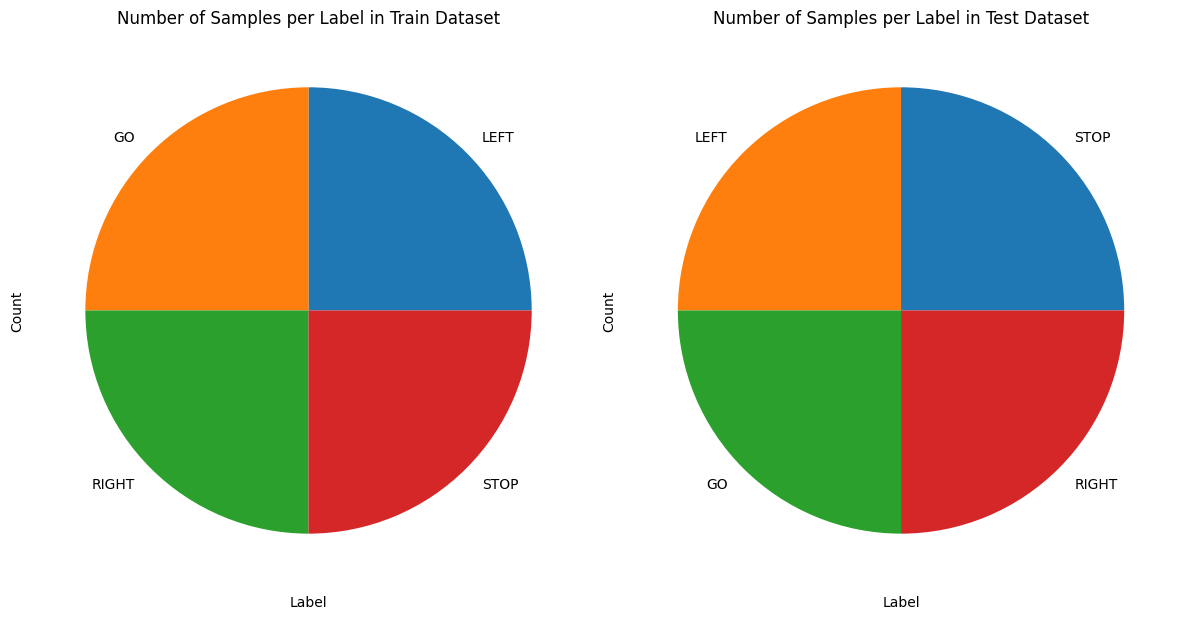

In [18]:
# Read the train and test datasets with labeled_train_4_class_data_log.csv and labeled_test_4_class_data_log.csv and plot the lables GO. STOP, LEFT, RIGHT  show here in the cell output
# Read the CSV file
train_csv_path = os.path.join(train_path, 'labeled_train_4_class_data_log.csv')
test_csv_path = os.path.join(test_path, 'labeled_test_4_class_data_log.csv')

# Check if the file exists
if not os.path.isfile(train_csv_path):
    raise FileNotFoundError(f"No such file or directory: '{train_csv_path}'")

if not os.path.isfile(test_csv_path):
    raise FileNotFoundError(f"No such file or directory: '{test_csv_path}'")

# Load the datasets
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Count the number of samples for each label
train_label_counts = train_df['label'].value_counts()
test_label_counts = test_df['label'].value_counts()

# Print the number of samples for each label
print("Train directory: ", train_path)
print("Train Dataset:")
print(train_label_counts)

print("\nTest directory: ", test_path)
print("\nTest Dataset:")
print(test_label_counts)    

# Plotting the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_label_counts.plot(kind='pie', color=['red', 'green', 'blue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Samples per Label in Train Dataset')

plt.subplot(1, 2, 2)
test_label_counts.plot(kind='pie', color=['red', 'green', 'blue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Samples per Label in Test Dataset')

plt.tight_layout()
plt.show()


    